### 10 class landmark recognition

The problem comes from a famous Kaggle competition, the Google Landmark Recognition Challenge. Training set contains over 1.2 million images spread across 14,951 classes of landmarks, varying from one to thousands of images per class. This problem of extreme classification is something that is very prevalent in the data science community today with the advancement of deep learning.

In [1]:
import numpy as np
import pandas as pd

from keras.utils import to_categorical
from keras.applications import MobileNet
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, AveragePooling2D, Dropout
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Model

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
train_data_dir = '/content/gdrive/My Drive/Colab Notebooks/Google Landmark Recognition/images/train'
validation_data_dir = '/content/gdrive/My Drive/Colab Notebooks/Google Landmark Recognition/images/validation'

batch_size = 16
img_height, img_width = 96, 96

We needed to start with general data preprocessing before we could implement CNNs from Keras for our image classification purposes. 

In [4]:
# Pixel values rescaling from [0, 255] to [0, 1] interval
train_generator = ImageDataGenerator(rescale=1/255, rotation_range=90, zoom_range=0.2, horizontal_flip=True)

validation_generator = ImageDataGenerator(rescale=1/255)

# Retrieve images and their classes for train and validation sets
train_flow = train_generator.flow_from_directory(directory=train_data_dir, 
                                                 batch_size=batch_size, target_size=(img_height,img_width))

validation_flow = validation_generator.flow_from_directory(
    directory=validation_data_dir, batch_size=batch_size, 
    target_size=(img_height,img_width))

Found 9917 images belonging to 10 classes.
Found 1969 images belonging to 10 classes.


In [0]:
nb_train_samples = 9917
nb_validation_samples = 1969
n_classes =  10
epochs = 10

### Basic CNN

We build a sequential model and add convolutional layers and max pooling layers to it. We also add dropout layers in between, dropout randomly switches off some neurons in the network which forces the data to find new paths. Therefore, this reduces overfitting. We add dense layers at the end which are used for class prediction.

Max-pooling: A technique used to reduce the dimensions of an image by taking the maximum pixel value of a grid. This also helps reduce overfitting and makes the model more generic. The example below show how 2 x 2 max pooling works

Exaple of 3 layers network on the image below:

<img src=https://www.learnopencv.com/wp-content/uploads/2017/11/cnn-schema1.jpg width="500">

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation= 'softmax'))

model.compile(loss='categorical_crossentropy',
            optimizer="adam",
            metrics=["accuracy"])

model.summary()


# Model saving callback
checkpointer = ModelCheckpoint(filepath='basic_cnn.h5py', monitor='val_acc', save_best_only=True)

# Early stopping
early_stopping = EarlyStopping(monitor='val_acc', verbose=1, patience=3)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 94, 94, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxP

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [12]:
history = model.fit_generator(generator=train_flow, 
                    samples_per_epoch=nb_train_samples,
                    validation_data=validation_flow,
                    nb_val_samples=nb_validation_samples,
                    callbacks=[checkpointer, early_stopping],
                    verbose=1,
                    epochs=epochs)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(generator=<keras_pre..., validation_data=<keras_pre..., callbacks=[<keras.ca..., verbose=1, epochs=10, steps_per_epoch=619, validation_steps=1969)`
  import sys


Epoch 1/10
619/619 [==============================] - 8588s 14s/step - loss: 2.2753 - acc: 0.1392 - val_loss: 2.2588 - val_acc: 0.1626
Epoch 2/10
619/619 [==============================] - 1075s 2s/step - loss: 2.1191 - acc: 0.2459 - val_loss: 2.0164 - val_acc: 0.2971
Epoch 3/10
619/619 [==============================] - 1079s 2s/step - loss: 1.8786 - acc: 0.3457 - val_loss: 1.8465 - val_acc: 0.3850
Epoch 4/10
619/619 [==============================] - 1076s 2s/step - loss: 1.6656 - acc: 0.4264 - val_loss: 1.4913 - val_acc: 0.4960
Epoch 5/10
619/619 [==============================] - 1058s 2s/step - loss: 1.5182 - acc: 0.4799 - val_loss: 1.4007 - val_acc: 0.5300
Epoch 6/10
619/619 [==============================] - 1063s 2s/step - loss: 1.4110 - acc: 0.5130 - val_loss: 1.5511 - val_acc: 0.5013
Epoch 7/10
619/619 [==============================] - 1065s 2s/step - loss: 1.3287 - acc: 0.5510 - val_loss: 1.2475 - val_acc: 0.5873
Epoch 8/10
619/619 [==============================] - 1068s 2

In [0]:
model.save('basic_cnn.h5py')
model_file = drive.CreateFile({'title' : 'basic_cnn.h5py'})
model_file.SetContentFile('basic_cnn.h5py')
model_file.Upload()

In [14]:
# download to google drive
drive.CreateFile({'id': model_file.get('id')})
'''
Loading models from Google Drive into Colab
file_obj = drive.CreateFile({'id': '16zbkEN4vqnPvIOvLMF1IaXKYCq5g3Yln'})
file_obj.GetContentFile('keras.h5')'''

"\nLoading models from Google Drive into Colab\nfile_obj = drive.CreateFile({'id': '16zbkEN4vqnPvIOvLMF1IaXKYCq5g3Yln'})\nfile_obj.GetContentFile('keras.h5')"

In [15]:
model.evaluate_generator(validation_flow, nb_validation_samples, workers=10)

[1.2120182698160524, 0.5996993346980553]

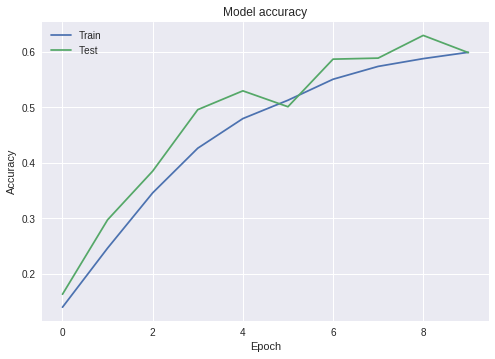

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Transfer Learning - predictions using weights from ImageNet (VGG16)**

Transfer learning is using pre-trained CNN architecture. When we train our own data on the top of the pre-trained parameters, we can easily reach to the target accuracy.

Different CNN architectures could be found in the Keras library — for example VGG16, VGG19, Inception, etc. While VGG19 and Inception are more heavier architectures (number of parameters to train), training VGG16 was doable in the time frame that we had.

The architecture of VGG16: the input layer takes an image in the size of (224 x 224 x 3), and the output layer is a softmax prediction on 1000 classes. From the input layer to the last max pooling layer (labeled by 7 x 7 x 512) is regarded as the feature extraction part of the model, while the rest of the network is regarded as the classification part of the model.

![alt text](https://s3.ap-south-1.amazonaws.com/techleer/309.jpg)

Before proceeding with any model training, VGG16 architecture trained on Imagenet dataset is picked up and is used to predict on the images that we had.

<img src=http://lh3.ggpht.com/-Fri9BOfQIe8/Sg1CCY2Uc7I/AAAAAAAACAY/5ya_xz8N2i0/s1600/ width="300">

In [2]:
from keras.applications import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions

In [23]:
model = VGG16(weights = 'imagenet', include_top = True)

img_path = r'/content/gdrive/My Drive/Colab Notebooks/Google Landmark Recognition/images/train/2061/0aa810ea624bb7b0.jpg'
img = image.load_img(img_path, target_size= (224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
x = preprocess_input(x)

preds = model.predict(x)
print ('Predicted:', decode_predictions(preds, top = 10)[0])

Predicted: [('n03877845', 'palace', 0.23293868), ('n03447447', 'gondola', 0.093717426), ('n03781244', 'monastery', 0.049728256), ('n02667093', 'abaya', 0.037438527), ('n02097130', 'giant_schnauzer', 0.032675724), ('n04485082', 'tripod', 0.018832762), ('n04486054', 'triumphal_arch', 0.018675718), ('n02098286', 'West_Highland_white_terrier', 0.018213551), ('n02111277', 'Newfoundland', 0.016907277), ('n02980441', 'castle', 0.01578292)]


In [7]:
h,w = 96, 96
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(h,w,3))

Instructions for updating:
Colocations handled automatically by placer.


Observation: Model predicted image class as "palace", which is true. Imagenet weights are successfully able to capture the generic features from landmarks.

In [8]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 96, 96, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 96, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 96, 96, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 48, 48, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 48, 48, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 48, 48, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 24, 24, 128)       0         
__________

In [9]:
top_model = Sequential()
top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
top_model.add(Dense(50,activation="relu"))
top_model.add(Dense(10,activation="sigmoid"))
top_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                230450    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 230,960
Trainable params: 230,960
Non-trainable params: 0
_________________________________________________________________


In [10]:
transfer_model = Sequential()
transfer_model.add(base_model)
transfer_model.add(top_model)

transfer_model.layers[0].trainable = False

transfer_model.compile(loss="binary_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

transfer_model.summary()

# Model saving callback
checkpointer = ModelCheckpoint(filepath='transfer_learned_cnn.h5py', monitor='val_acc', save_best_only=True)

# Early stopping
early_stopping = EarlyStopping(monitor='val_acc', verbose=1, patience=3)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 3, 3, 512)         14714688  
_________________________________________________________________
sequential_1 (Sequential)    (None, 10)                230960    
Total params: 14,945,648
Trainable params: 230,960
Non-trainable params: 14,714,688
_________________________________________________________________


In [11]:
train_generator = ImageDataGenerator(rescale=1/255,
                                     rotation_range=90,
                                     zoom_range=0.2,
                                     horizontal_flip=True)
validation_generator = ImageDataGenerator(rescale=1/255)

train_flow = train_generator.flow_from_directory(
    directory=train_data_dir, batch_size=batch_size, 
    target_size=(h,w))

validation_flow = validation_generator.flow_from_directory(
    directory=validation_data_dir, batch_size=batch_size, 
    target_size=(h,w))

transfer_history = transfer_model.fit_generator(generator=train_flow, 
                    samples_per_epoch=nb_train_samples,
                    validation_data=validation_flow,
                    nb_val_samples=nb_validation_samples,
                    callbacks=[checkpointer, early_stopping],
                    epochs=10)

Found 9917 images belonging to 10 classes.
Found 1969 images belonging to 10 classes.
Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(generator=<keras_pre..., validation_data=<keras_pre..., callbacks=[<keras.ca..., epochs=10, steps_per_epoch=619, validation_steps=1969)`


Epoch 1/10
619/619 [==============================] - 1106s 2s/step - loss: 0.2163 - acc: 0.9220 - val_loss: 0.1851 - val_acc: 0.9329
Epoch 2/10
619/619 [==============================] - 1104s 2s/step - loss: 0.1724 - acc: 0.9372 - val_loss: 0.1713 - val_acc: 0.9375
Epoch 3/10
619/619 [==============================] - 1094s 2s/step - loss: 0.1610 - acc: 0.9408 - val_loss: 0.1599 - val_acc: 0.9405
Epoch 4/10
619/619 [==============================] - 1091s 2s/step - loss: 0.1524 - acc: 0.9439 - val_loss: 0.1549 - val_acc: 0.9433
Epoch 5/10
619/619 [==============================] - 1099s 2s/step - loss: 0.1468 - acc: 0.9467 - val_loss: 0.1625 - val_acc: 0.9405
Epoch 6/10
619/619 [==============================] - 1099s 2s/step - loss: 0.1422 - acc: 0.9475 - val_loss: 0.1421 - val_acc: 0.9471
Epoch 7/10
619/619 [==============================] - 1095s 2s/step - loss: 0.1390 - acc: 0.9490 - val_loss: 0.1422 - val_acc: 0.9472
Epoch 8/10
619/619 [==============================] - 1110s 2s

In [0]:
# save the learned network for feature work
transfer_model.save('transfer_learnd_cnn.h5py')
transfer_model_file = drive.CreateFile({'title' : 'transfer_learnd_cnn.h5py'})
transfer_model_file.SetContentFile('transfer_learnd_cnn.h5py')
transfer_model_file.Upload()

In [24]:
# download to google drive
drive.CreateFile({'id': transfer_model_file.get('id')})

GoogleDriveFile({'id': '1hwCng9Iko0JXaKg108N4KIo_2cBUeQBJ'})

In [15]:
# loss and accuracy on validation set
transfer_model.evaluate_generator(validation_flow, nb_validation_samples, workers=10)

[0.15449867440714812, 0.9435324881706261]

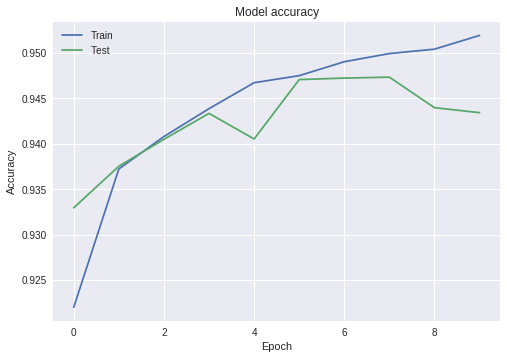

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.plot(transfer_history.history['acc'])
plt.plot(transfer_history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Test data

Now i am checking my model on the test data to be sure it's working.

In [7]:
from keras.models import load_model
final_model = load_model('transfer_learnd_cnn.h5py')

/home/natalia/anaconda3/lib/python3.6/site-packages/keras/engine/saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [8]:
#load test data
test_data_dir = 'images/test/'

In [11]:
img_height, img_width = 96, 96
batch_size =16

#standarize images for predicting
test_generator = ImageDataGenerator(rescale=1/255)

test_flow = test_generator.flow_from_directory(directory=test_data_dir, 
                                                 batch_size=batch_size, target_size=(img_height,img_width))

Found 184 images belonging to 10 classes.


In [13]:
final_model.evaluate_generator(test_flow, test_flow.samples / batch_size, verbose=1)

12/11 [===============================] - 50s 4s/step


[0.14587437912173892, 0.94565217391304346]

### Referances:

* https://www.kaggle.com/codename007/a-very-extensive-landmark-exploratory-analysis
* https://towardsdatascience.com/google-landmark-recognition-using-transfer-learning-dde35cc760e1
* https://github.com/anishagg/Google-Landmark-Recognition/blob/master/Scripts/Landmark_Recognition.ipynb
* https://github.com/svetlana-topalova/Landmark-Recognition/blob/master/DL_Project_Landmark%20Recognition.ipynb
* https://s3.ap-south-1.amazonaws.com/techleer/309.jpg
* http://lh3.ggpht.com/-Fri9BOfQIe8/Sg1CCY2Uc7I/AAAAAAAACAY/5ya_xz8N2i0/s1600
* https://www.learnopencv.com/wp-content/uploads/2017/11/cnn-schema1.jpg